In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/plant_small_1D.csv")
print(df)

    Color Intensity  Plant Health
0         97.861832             1
1         96.366280             1
2         94.466888             1
3         92.559662             1
4         89.177300             1
5         87.001213             1
6         83.261986             1
7         79.915855             1
8         79.172501             1
9         78.052917             1
10        77.815674             1
11        71.518936             1
12        64.589409             1
13        63.992104             1
14        60.276337             1
15        56.804455             1
16        54.881351             1
17        54.488319             1
18        52.889492             1
19        52.184834             1
20        46.147938             1
21        43.758720             1
22        42.365479             1
23        41.466194             1
24        38.344151             1
25        14.335329             0
26        11.827442             0
27         8.712930             0
28         7.1

In [3]:
feature_count = df.shape[1] - 1
rows_list = []
for i in range(len(df)):
    new_row = np.array(df.iloc[i,0])
    rows_list.append(new_row)
    
x = np.array(rows_list)
y = np.array(df.iloc[:,feature_count])
print(x.shape)
print(y.shape)

(30,)
(30,)


In [4]:
n = len(y)
randy = np.random.default_rng()
idx = np.arange(n)
randy.shuffle(idx)

## Splits the data into 80% training and 20% validation
train_idx = idx[:int(n*.8)]
val_idx = idx[int(n*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

training_lenth = len(x_train)
validation_length = len(x_val)
print(f"The training data has {training_lenth} observations.")
print(f"The validation data has {validation_length} observations.")

The training data has 24 observations.
The validation data has 6 observations.


In [5]:
pos = y_train == 1 ##y_train = 1 is Ture
neg = y_train == 0
print(pos)

[False False  True  True  True False  True  True False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True]


In [6]:
x_train[pos]

array([96.3662796 , 83.26198578, 92.55966187, 38.34415054, 54.88135147,
       94.46688843, 89.1772995 , 43.7587204 , 60.27633667, 79.17250061,
       79.91585541, 71.51893616, 87.00121307, 42.36547852, 56.8044548 ,
       77.81567383, 52.88949203, 64.58940887, 97.86183167])

In [7]:
sns.set_theme(palette="flare")
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

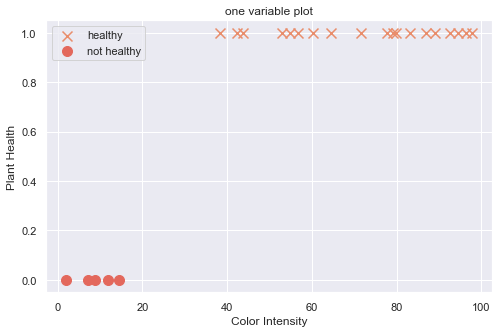

In [8]:
fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x_train[pos],y_train[pos], marker = 'x', s=100, label="healthy")
ax.scatter(x_train[neg],y_train[neg], marker = 'o', s=100, label = "not healthy")

ax.set_ylabel('Plant Health', fontsize=12)
ax.set_xlabel('Color Intensity', fontsize=12)
ax.set_title('one variable plot')
ax.legend()

plt.show()

## Select a value for w and b

In [14]:
## Set w, b, alpha
w = .7
b = -10
alpha = .1
iterations = 200
columns = ['iteration', 'J', 'w', 'b']
results = pd.DataFrame(columns = columns)

In [10]:
## Plot the data against the model using the initial values of w and b:
x_line = np.linspace(0, 100, 50)
z=(w*x_line)+b
y_line = 1/(1+np.exp(-z))

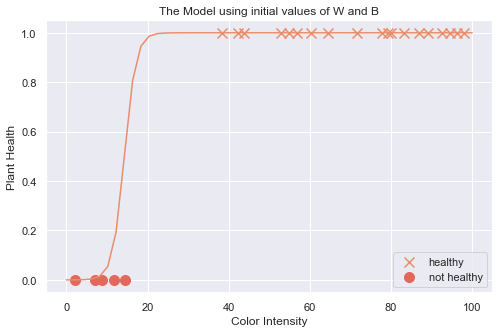

In [11]:
fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x_train[pos],y_train[pos], marker = 'x', s=100, label="healthy")
ax.scatter(x_train[neg],y_train[neg], marker = 'o', s=100, label = "not healthy")
plt.plot(x_line, y_line)


ax.set_ylabel('Plant Health', fontsize=12)
ax.set_xlabel('Color Intensity', fontsize=12)
ax.set_title('The Model using initial values of W and B')
ax.legend()

plt.show()

## Running Gradient Descent to define a model

In [12]:
def compute_cost(x, y, w, b):
    
    s = 0
    for i in range(len(x)):
        xi = x[i]
        yi = y[i]
        z = (w * xi) + b
        yhat = 1/(1 + np.exp(-z))
        loss = (-yi)*(np.log(yhat))-(1-yi)*(np.log(1-yhat))
        s = s + loss
    
    J = (1/len(x)) * s
    
    return J, w, b

def add_results(J, w, b, iteration):
    new_row = {'iteration': iteration, 'J': J, 'w': w, 'b': b}
    results.loc[len(results)] = new_row   
    
def update_w_b(x, y, w_init, b_init, alpha):

    s = 0
    for i in range(len(x)):
        xi = x[i]
        yi = y[i]
        z = (w_init*xi) + b_init
        yhat = 1/(1 + np.exp(-z))
        funct = (yhat - yi)*xi
        s = s + funct
    
    w = w_init - (alpha * (1/len(x)) * s)
        
    s = 0
    for i in range(len(x)):
        xi = x[i]
        yi = y[i]
        z = (w_init*xi) + b_init
        yhat = 1/(1 + np.exp(-z))
        funct = (yhat - yi)
        s = s + funct
        
    b = b_init - (alpha * (1/len(x)) * s)
    
    return w, b

def gradient_descent(x, y, w, b, iterations):
    
    for i in range(iterations):
        J, w, b = compute_cost(x, y, w, b)
        add_results(J, w, b, i)
        
        w, b = update_w_b(x, y, w, b, alpha)
        
    return results

In [15]:
gradient_descent(x_train, y_train, w, b, iterations)

C:\Users\kasey\AppData\Local\Temp\ipykernel_13104\3509220294.py:9: RuntimeWarning: divide by zero encountered in log
  loss = (-yi)*(np.log(yhat))-(1-yi)*(np.log(1-yhat))
C:\Users\kasey\AppData\Local\Temp\ipykernel_13104\3509220294.py:9: RuntimeWarning: invalid value encountered in multiply
  loss = (-yi)*(np.log(yhat))-(1-yi)*(np.log(1-yhat))
C:\Users\kasey\AppData\Local\Temp\ipykernel_13104\3509220294.py:9: RuntimeWarning: divide by zero encountered in log
  loss = (-yi)*(np.log(yhat))-(1-yi)*(np.log(1-yhat))
C:\Users\kasey\AppData\Local\Temp\ipykernel_13104\3509220294.py:9: RuntimeWarning: invalid value encountered in multiply
  loss = (-yi)*(np.log(yhat))-(1-yi)*(np.log(1-yhat))
C:\Users\kasey\AppData\Local\Temp\ipykernel_13104\3509220294.py:9: RuntimeWarning: divide by zero encountered in log
  loss = (-yi)*(np.log(yhat))-(1-yi)*(np.log(1-yhat))
C:\Users\kasey\AppData\Local\Temp\ipykernel_13104\3509220294.py:9: RuntimeWarning: invalid value encountered in multiply
  loss = (-yi)*(

,iteration,J,w,b
0,0,NaN,0.700000,-10.000000
1,1,NaN,0.661223,-10.002862
2,2,NaN,0.633351,-10.004915
3,3,NaN,0.612183,-10.006473
4,4,NaN,0.595322,-10.007716
...,...,...,...,...
195,195,0.001139,0.399082,-10.030151
196,196,0.001139,0.399084,-10.030208
197,197,0.001138,0.399086,-10.030265
198,198,0.001138,0.399088,-10.030323


## Plot the model

In [16]:
model_w = 0.399089
model_b = -10.030380

In [17]:
x_line = np.linspace(0, 100, 50)
z=(model_w*x_line)+model_b
y_line = 1/(1+np.exp(-z))

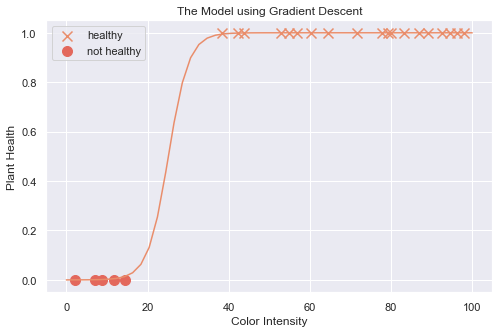

In [18]:
fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x_train[pos],y_train[pos], marker = 'x', s=100, label="healthy")
ax.scatter(x_train[neg],y_train[neg], marker = 'o', s=100, label = "not healthy")
plt.plot(x_line, y_line)


ax.set_ylabel('Plant Health', fontsize=12)
ax.set_xlabel('Color Intensity', fontsize=12)
ax.set_title('The Model using Gradient Descent')
ax.legend()

plt.show()